In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as sc

In [2]:
data = pd.read_csv("./dataset.csv")

In [3]:
data.shape

(6347, 19)

In [4]:
data.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', 'Children', 'Clubhouse',
       'Intercom', 'Landscaped Gardens', 'Indoor Games', 'Gas Connection',
       'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [5]:
data.drop('Unnamed: 0' , inplace=True , axis=1)

<h3><mark>Removing the locationn that does not have more than 10 data points</mark></h3>

In [6]:
data = data[data.groupby('Location')['Location'].transform('size') >=10]
len(data)

5569

In [7]:
len(data['Location'].unique())

92

<h3><mark>Removing the Amenities that are not  there in more than 40% of data</mark></h3>

In [8]:
def percent_missing(data):
    percent_0 = 100* data.isin([0]).sum() / len(data)
    percent_0 = percent_0[percent_0>0]
    return percent_0

In [9]:
percent_0 = percent_missing(data)
percent_0

New/Resale            63.727779
Gymnasium             39.235051
Lift Available        18.854372
Car Parking           46.040582
Maintenance Staff     75.938229
24x7 Security         45.483929
Children              39.791704
Clubhouse             46.633148
Intercom              47.908062
Landscaped Gardens    62.470821
Indoor Games          76.243491
Gas Connection        74.681271
Jogging Track         58.143293
Swimming Pool         50.817023
dtype: float64

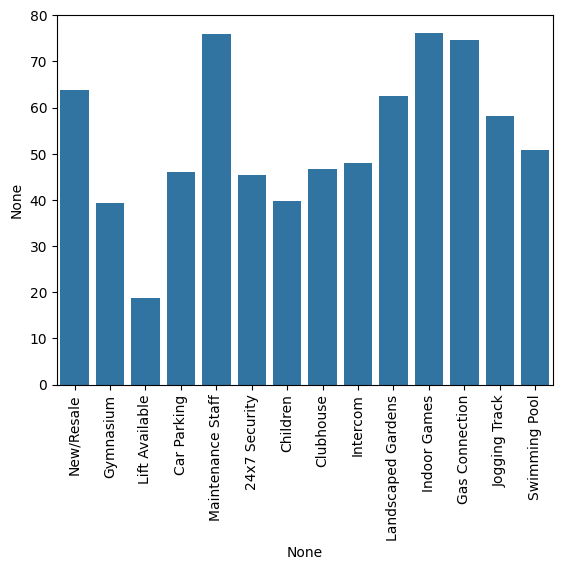

In [10]:
sns.barplot(x=percent_0.index,y=percent_0)
plt.xticks(rotation=90);

In [11]:
features = [
    "Gymnasium",
    "Car Parking",
    "Maintenance Staff",
    "24x7 Security",
    "Children",
    "Clubhouse",
    "Intercom",
    "Landscaped Gardens",
    "Indoor Games",
    "Gas Connection",
    "Jogging Track",
    "Swimming Pool"
]
data = data.drop(columns=features)

<h3><mark>Removing Outliers from Data</mark></h3>

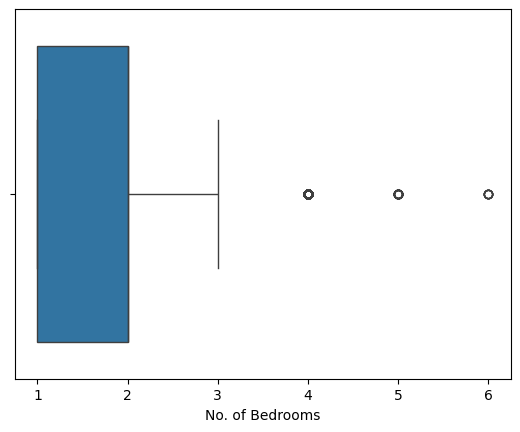

In [12]:
# Box plot for No. of Bedrooms
sns.boxplot(x=data['No. of Bedrooms'])
plt.xlabel('No. of Bedrooms')
plt.show()

In [13]:
data = data.drop(index=(data[data['No. of Bedrooms']>=4].index))

<Axes: ylabel='Price'>

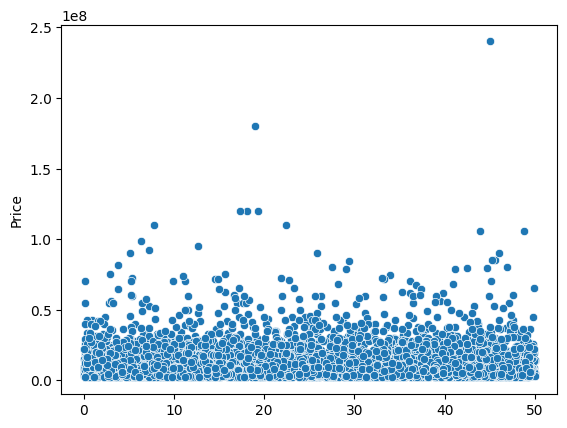

In [14]:
sns.scatterplot(data=data , y='Price' , x=np.random.rand(len(data))*50)

In [15]:
data['Price_zscore'] = sc.stats.zscore(data['Price'])

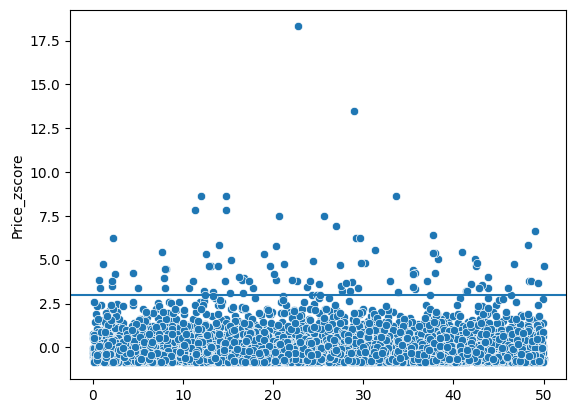

In [16]:
sns.scatterplot(data=data , y='Price_zscore' , x=np.random.rand(len(data))*50)
plt.axhline(3)

In [17]:
data = data[(data['Price_zscore'].abs() <= 2)]

<Axes: ylabel='Price'>

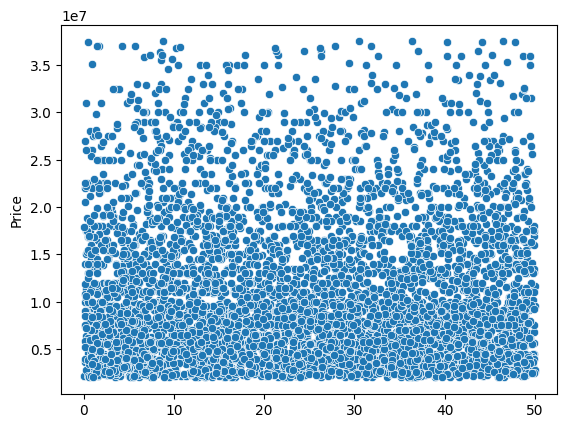

In [18]:
# Generate random values for the x-axis
x_random = np.random.rand(len(data)) * 50

# Create the scatter plot with the filtered data
sns.scatterplot(x=x_random, y=data['Price'])

In [19]:
data = data.drop('Price_zscore' ,axis=1)

<h2><mark>Area vs Price</mark></h2>

<Axes: xlabel='Area', ylabel='Price'>

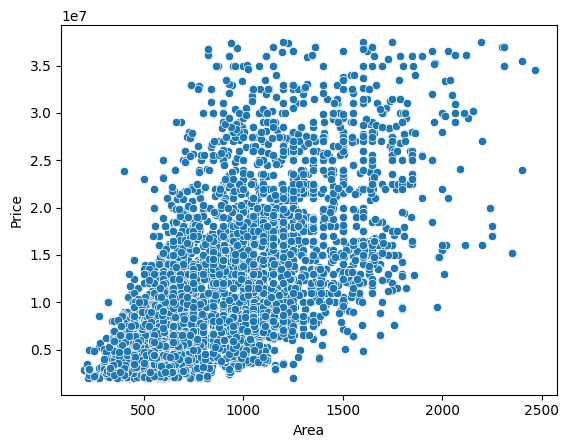

In [20]:
sns.scatterplot(data=data , x='Area', y='Price')

In [21]:
temp = data[['Area','Price']].to_numpy()
covariance = np.linalg.inv(np.cov(temp,rowvar=False))
center = np.mean(temp ,axis=0)

<mark>Calculating Mahalanobis Distance</mark>

In [22]:
distances = []
for i in temp:
    p1 = i
    p2 = center
    dist = sc.spatial.distance.mahalanobis(i,center,covariance)
    distances.append(dist)

In [23]:
cutoff = np.sqrt(sc.stats.chi2.ppf(0.95, df=2))
outliers = np.where(distances>cutoff)
data = data[(distances<cutoff)]

<Axes: xlabel='Area', ylabel='Price'>

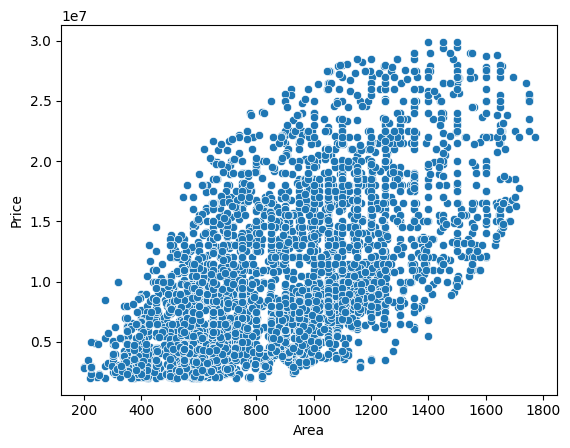

In [24]:
sns.scatterplot(data=data , x='Area', y='Price')

Standard Area to Bedroom Ratio must be greater than 300

In [25]:
data = data.drop(index=(data[data.Area/data['No. of Bedrooms']<300]).index)

<h3><mark>Handling Categorical Data</mark></h3>

In [26]:
len(data.select_dtypes(include='object')['Location'].unique())

90

In [27]:
df_nums = data.select_dtypes(exclude='object')
df_objs = data.select_dtypes(include='object')

<h3><mark>One Hot Encoding</mark></h3>

In [28]:
df_objs = pd.get_dummies(df_objs)

In [29]:
df_objs

,Location_Airoli,Location_Ambernath East,Location_Ambernath West,Location_Andheri,Location_Andheri East,Location_Andheri West,Location_Badlapur East,Location_Bandra East,Location_Bandra West,Location_Belapur,...,Location_Vashi,Location_Ville Parle East,Location_Virar,Location_Virar East,Location_Virar West,Location_Wadala,Location_Wadala East Wadala,Location_Worli,Location_matunga east,Location_mumbai
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6341,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6343,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6344,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [31]:
final_df.shape

(4668, 95)

In [32]:
final_df['Price'] = final_df['Price']/100000

In [36]:
final_df.head()

,Price,Area,No. of Bedrooms,New/Resale,Lift Available,Location_Airoli,Location_Ambernath East,Location_Ambernath West,Location_Andheri,Location_Andheri East,...,Location_Vashi,Location_Ville Parle East,Location_Virar,Location_Virar East,Location_Virar West,Location_Wadala,Location_Wadala East Wadala,Location_Worli,Location_matunga east,Location_mumbai
0,48.5,720,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,45.0,600,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,67.0,650,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45.0,650,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,50.0,665,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h3><mark>Cleaned Dataset</mark></h3>

In [34]:
final_df.to_csv("./house_data_final.csv",index=False)